<a href="https://colab.research.google.com/github/thais-siqueira/my_projects/blob/main/APL_Atividade2_Thais_Siqueira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo:** construir um *deep autoencoder* utilizando a base de dados `CIFAR-10` e comparar as imagens originais com as imagens decodificadas.

* As dimensões das imagens são 32 x 32 e possuem 3 canais por serem coloridas. Por isso, a quantidade total de dados de cada imagem é de 3072 (que equivale a quantidade de neurônios na camada de entrada e camada de saída);
*Para que o tempo de processamento não seja tão alto , você pode criar duas camadas ocultas para este experimento
* Ao utilizar o método reshape na visualização das imagens, utilize como parâmetro o número de canais. Por exemplo: reshape(32, 32, 3).


In [ ]:
% tensorflow_version 2.x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Habilitar GPU (Editar > Configurações de notebook)
# Deve imprimir '/device:GPU:0'
print(tf.test.gpu_device_name())

/device:GPU:0


#### 1. Carregue os dados em memória.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### 2. Reformate os dados de entrada de treinamento e teste, mudando a dimensão dos conjuntos.

In [ ]:
# Reformatando os dados de treinamento
x_train = x_train.astype('float32')/255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

# Reformatando os dados de teste
x_test = x_test.astype('float32')/255.0
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#### 3. Imprime as 50 primeiras imagens do conjunto de treinamento.

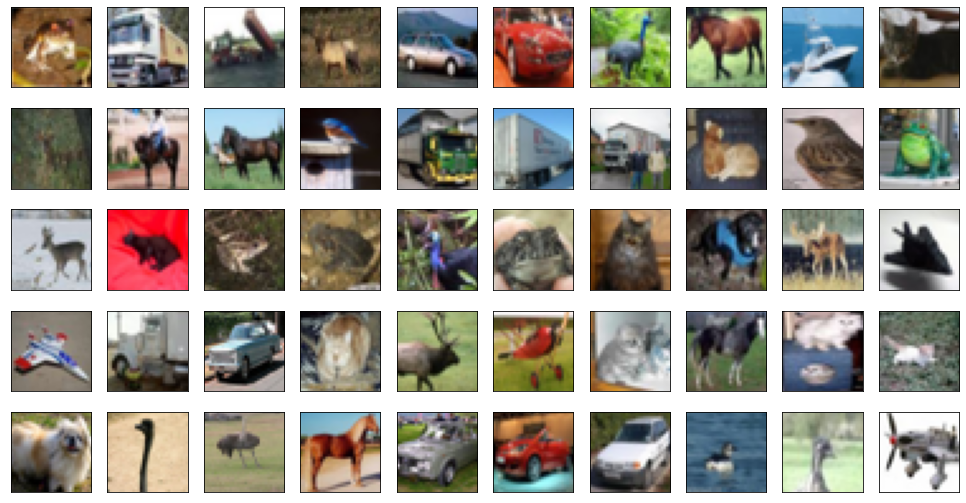

In [ ]:
# Definindo as dimensões das imagens
plt.figure(figsize=(17, 9))

# Iterando sobre o conjunto de treino para imprimir as 50
# primeiras imagens
for i in range(50):
    eixo = plt.subplot(5, 10, i + 1)   # Define quantas imagens terá cada linha
    plt.imshow(x_train[i].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
    
plt.show()

4. Defina o modelo neural autoencoder com 4 camadas totalmente conectadas.

In [ ]:
# Dimensão das imagens na entrada: 32 x 32 x 3
input_img = Input(shape=(3072,))

# Encoder
enc = Dense(512, activation='relu')(input_img)

# Camadas intermediárias
dense1 = Dense(192, activation='relu')(enc)

# Camada de saída
dense_output = Dense(192, activation='relu')(dense1)

# Decoder
dec = Dense(3072, activation='sigmoid')(dense_output)

# Reconstroi as imagens após encoder e decoder
autoencoder = Model(input_img, dec)

In [ ]:
# Resumo do modelo
autoencoder.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_27 (Dense)             (None, 192)               98496     
_________________________________________________________________
dense_28 (Dense)             (None, 192)               37056     
_________________________________________________________________
dense_29 (Dense)             (None, 3072)              592896    
Total params: 2,301,824
Trainable params: 2,301,824
Non-trainable params: 0
_________________________________________________________________


5. Compile o modelo.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

6. Ajuste o modelo aos dados de treinamento. Defina uma quantidade de épocas.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=192,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
261/261 [==============================] - 3s 9ms/step - loss: 0.6492 - accuracy: 0.0018 - val_loss: 0.6067 - val_accuracy: 0.0038
Epoch 2/100
261/261 [==============================] - 2s 8ms/step - loss: 0.6012 - accuracy: 0.0045 - val_loss: 0.5919 - val_accuracy: 0.0067
Epoch 3/100
261/261 [==============================] - 2s 8ms/step - loss: 0.5895 - accuracy: 0.0056 - val_loss: 0.5871 - val_accuracy: 0.0067
Epoch 4/100
261/261 [==============================] - 2s 8ms/step - loss: 0.5837 - accuracy: 0.0060 - val_loss: 0.5822 - val_accuracy: 0.0080
Epoch 5/100
261/261 [==============================] - 2s 8ms/step - loss: 0.5814 - accuracy: 0.0073 - val_loss: 0.5807 - val_accuracy: 0.0089
Epoch 6/100
261/261 [==============================] - 2s 8ms/step - loss: 0.5798 - accuracy: 0.0076 - val_loss: 0.5792 - val_accuracy: 0.0096
Epoch 7/100
261/261 [==============================] - 2s 8ms/step - loss: 0.5783 - accuracy: 0.0087 - val_loss: 0.5785 - val_accuracy: 0.0111

7. Codifique o conjunto de teste.

In [ ]:
# Cria o modelo Encoder/Decoder
encoded_input = Input(shape=(3072,))
camada_layer1 = autoencoder.layers[1]
camada_layer2 = autoencoder.layers[2]
camada_layer3 = autoencoder.layers[3]


encoder = Model(encoded_input,
                camada_layer3(
                    camada_layer2(
                        camada_layer1(encoded_input))))

In [ ]:
encoded_imgs = encoder.predict(x_test)

8. Decodifique o conjunto de teste.

In [ ]:
decoded_input = Input(shape=(192,))

# Recupera a última camada do modelo autoencoder
decoder_layer = autoencoder.layers[-1]
decoder = Model(decoded_input, decoder_layer(decoded_input))
decoder.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 192)]             0         
_________________________________________________________________
dense_29 (Dense)             (None, 3072)              592896    
Total params: 592,896
Trainable params: 592,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Imagens decodificadas
decoded_imgs = decoder.predict(encoded_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

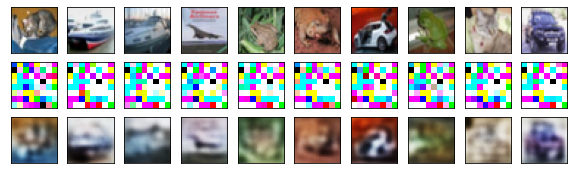

In [ ]:
# Imprime as imagens
n = 10

plt.figure(figsize=(10, 10))
for i in range(n):
    # Imagem original
    eixo = plt.subplot(10, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
    
    # Imagem codificada
    eixo = plt.subplot(10, n, n + i + 1)
    plt.imshow(encoded_imgs[i].reshape(8, 8, 3))
    plt.xticks(())
    plt.yticks(())

    # Imagem decodificada/reconstruída
    eixo = plt.subplot(10, n, 2 * n + i + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())

plt.show()

**Responda:** as imagens decodificadas ficaram semelhantes às imagens originais? Justifique.

*Não, não ficaram semelhantes pois perderam informação durante o processo de codificação e decodificação, embora a silhueta das imagens decodificadas aindam sejam um pouco semelhantes às imagens originais.*